[**Demo %s**](#demo-tpbvp-mems)

```{index} ! Julia; in-place function
```

As a system, the MEMS problem from {numref}`Example {number} <example-tpbvp-mems>` uses $y_1=w$, $y_2=w'$ to obtain

:::{math}
:label: memssys-intro
\begin{split}
y_1' &= y_2, \\
y_2' &= \frac{\lambda}{y_1^2} - \frac{y_2}{r}.
\end{split}
:::

We will code an *in-place* form of this ODE, in which the first argument is used to return the computed values of $y_1'$ and $y_2'$.  

```{tip}
:class: dropdown
The in-place code here saves the computing time that would otherwise be needed to allocate memory for `f` repeatedly.
```

In [2]:
function ode!(f, y, λ, r)
    f[1] = y[2]
    f[2] = λ / y[1]^2 - y[2] / r
    return nothing
end;

Notice that the `return` value is irrelevant with the in-place style. We use the same style for the boundary conditions $y_2(0)=0$, $y_1(1)=1$.

In [3]:
function bc!(g, y, λ, r)
    g[1] = y[1][2]          # first node, second component = 0
    g[2] = y[end][1] - 1    # last node, first component = 1
    return nothing
end;

In the `bc!` function, the `y` argument is just like an IVP solution from {numref}`section-ivp-basics`. Thus, `y(0)` is the value of the solution at $x=0$, and the second component of that value is what we wish to make zero. Similarly, `y(1)[1]` is the notation for $y_1(1)$, which is supposed to equal 1. 

The domain of the mathematical problem is $r\in [0,1]$. However, there is a division by $r$ in the ODE, so we want to avoid $r=0$ by truncating the domain a bit.

In [4]:
domain = (eps(), 1.0)

(2.220446049250313e-16, 1.0)

We need one last ingredient that is not part of the mathematical setup: an initial estimate for the solution. As we will see, this plays the same role as initialization in Newton's method for rootfinding. Here, we try a constant value for each component.

In [5]:
est = [1, 0]

2-element Vector{Int64}:
 1
 0

Now we set up and solve a `BVProblem` with the parameter value $\lambda=0.6$.

┌ Warning: First function call produced NaNs. Exiting. Double check that none of the initial conditions, parameters, or timespan values are NaN.
└ @ OrdinaryDiffEqCore ~/.julia/packages/OrdinaryDiffEqCore/3Talm/src/initdt.jl:131


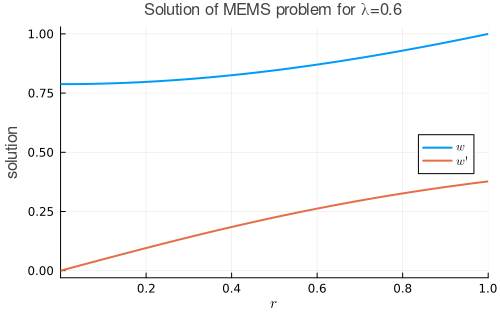

In [6]:
using BoundaryValueDiffEq
bvp = BVProblem(ode!, bc!, est, domain, 0.6)
y = solve(bvp, Shooting(Tsit5()))
plot(y;
    label = [L"w" L"w'"],
    legend = :right,
    xlabel = L"r",
    ylabel = "solution",
    title = "Solution of MEMS problem for λ=0.6",
)

To visual accuracy, the boundary conditions have been enforced. We can check them numerically.

In [7]:
@show y(0)[2];    # y_2(0)
@show y(1)[1];    # y_1(1)

(y(0))[2] = -2.1468729870818984e-16
(y(1))[1] = 0.9999999999998375
